In [2]:
import warnings
warnings.filterwarnings('ignore')

##data understanding and exploration


In [4]:
import pandas as pd 
import numpy as np 


In [5]:
dataset = pd.read_csv('Boombike.csv')

In [6]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
dataset.shape 

(730, 16)

In [8]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
#assingning the string values to differnt seasons instead of numeric values 
#1- spring 
dataset.loc[(dataset['season']==1),'season']="spring"
#- summer 
dataset.loc[(dataset['season']==2),'season']="summer"
#-fall
dataset.loc[(dataset['season']==3),'season']="fall"
#4= winter
dataset.loc[(dataset['season']==4),'season']="winter"



In [12]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [13]:
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [14]:
dataset['mnth'].astype('category').value_counts()

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64

In [15]:
def object_map_months(x):
    return x.map({1:'jan',
                  2:'feb',
                  3:'mar',
                  4:'apr',
                  5:'may',
                  6:'jun',
                  7:'july',
                  8:'aug',
                  9:'sep',
                  10:'oct',
                  11:'nov',
                  12:'dec',
                  })

In [16]:
dataset[['mnth']] =dataset[['mnth']].apply(object_map_months)

In [17]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [18]:
dataset['holiday'].astype('category').value_counts()


holiday
0    709
1     21
Name: count, dtype: int64

In [19]:
dataset['holiday'].astype('category').value_counts()


holiday
0    709
1     21
Name: count, dtype: int64

In [20]:
dataset['weekday'].astype('category').value_counts()


weekday
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

In [21]:
def object_map_weekdays(y):
    return y.map({
                  0:'mon',
                  1:'tue',
                  2:'wed',
                  3:'thur',
                  4:'fri',
                  5:'sat',
                  6:'sun'
                 })

In [22]:
dataset[['weekday']].astype("category")

,weekday
0,6
1,0
2,1
3,2
4,3
...,...
725,4
726,5
727,6
728,0


In [23]:
dataset[['weekday']] =dataset[['weekday']].apply(object_map_weekdays)


In [24]:
dataset[['weekday']].astype("category")

,weekday
0,sun
1,mon
2,tue
3,wed
4,thur
...,...
725,fri
726,sat
727,sun
728,mon


In [25]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,jan,0,sun,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,jan,0,mon,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,jan,0,tue,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,jan,0,wed,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,jan,0,thur,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,1,dec,0,fri,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,sat,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,sun,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,mon,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [26]:
dataset['workingday'].astype("category").value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [27]:
dataset['weathersit'].astype("category").value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [28]:
dataset.loc[(dataset['weathersit']==1),'weathersit']='A'
dataset.loc[(dataset['weathersit']==2),'weathersit']='B'
dataset.loc[(dataset['weathersit']==3),'weathersit']='C'


In [29]:
dataset['weathersit'].astype("category").value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

In [30]:
##datavitualiziation
import matplotlib.pyplot as plt 
import seaborn as sns


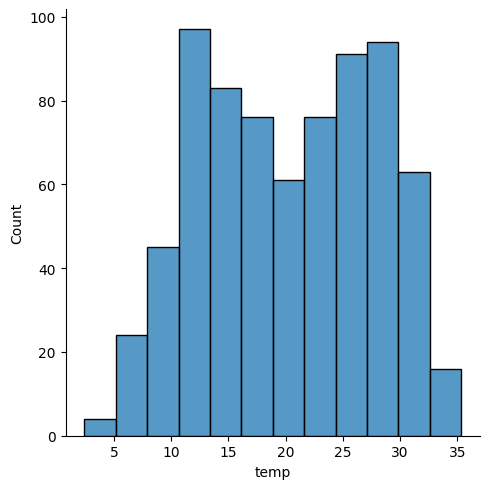

In [31]:
#temparatture 
sns.displot(dataset['temp'])

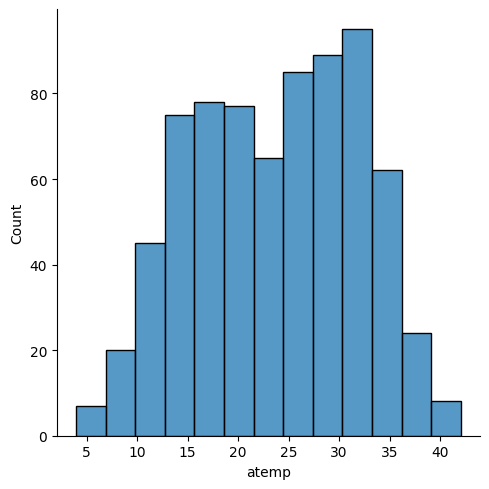

In [32]:
sns.displot(dataset['atemp'])

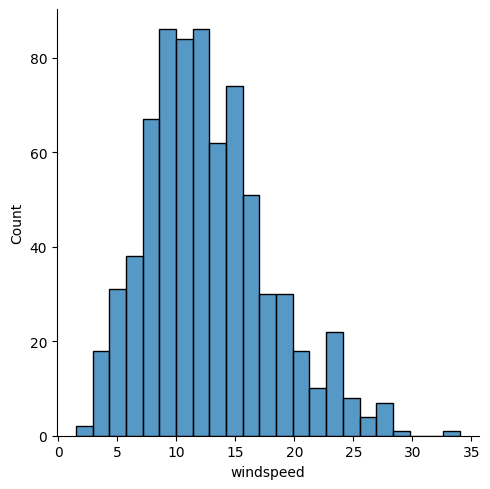

In [33]:
sns.displot(dataset['windspeed'])

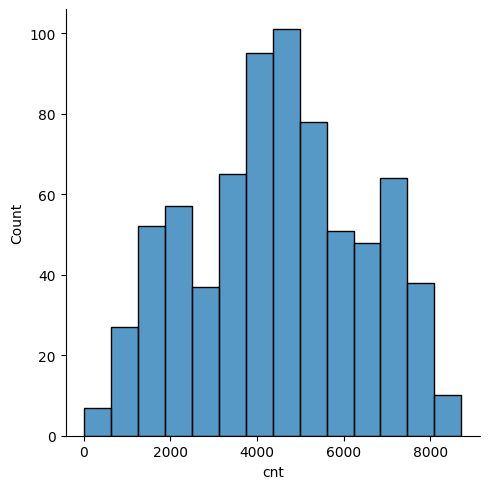

In [34]:
sns.displot(dataset['cnt'])

In [35]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [36]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime','int64'])

In [37]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [38]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,jan,sun,B
1,spring,jan,mon,B
2,spring,jan,tue,A
3,spring,jan,wed,A
4,spring,jan,thur,A
...,...,...,...,...
725,spring,dec,fri,B
726,spring,dec,sat,B
727,spring,dec,sun,B
728,spring,dec,mon,A


In [39]:
import importlib
import matplotlib.pyplot as plt
importlib.reload(plt)

<module 'matplotlib.pyplot' from 'C:\\Users\\chita\\AppData\\Roaming\\Python\\Python312\\site-packages\\matplotlib\\pyplot.py'>

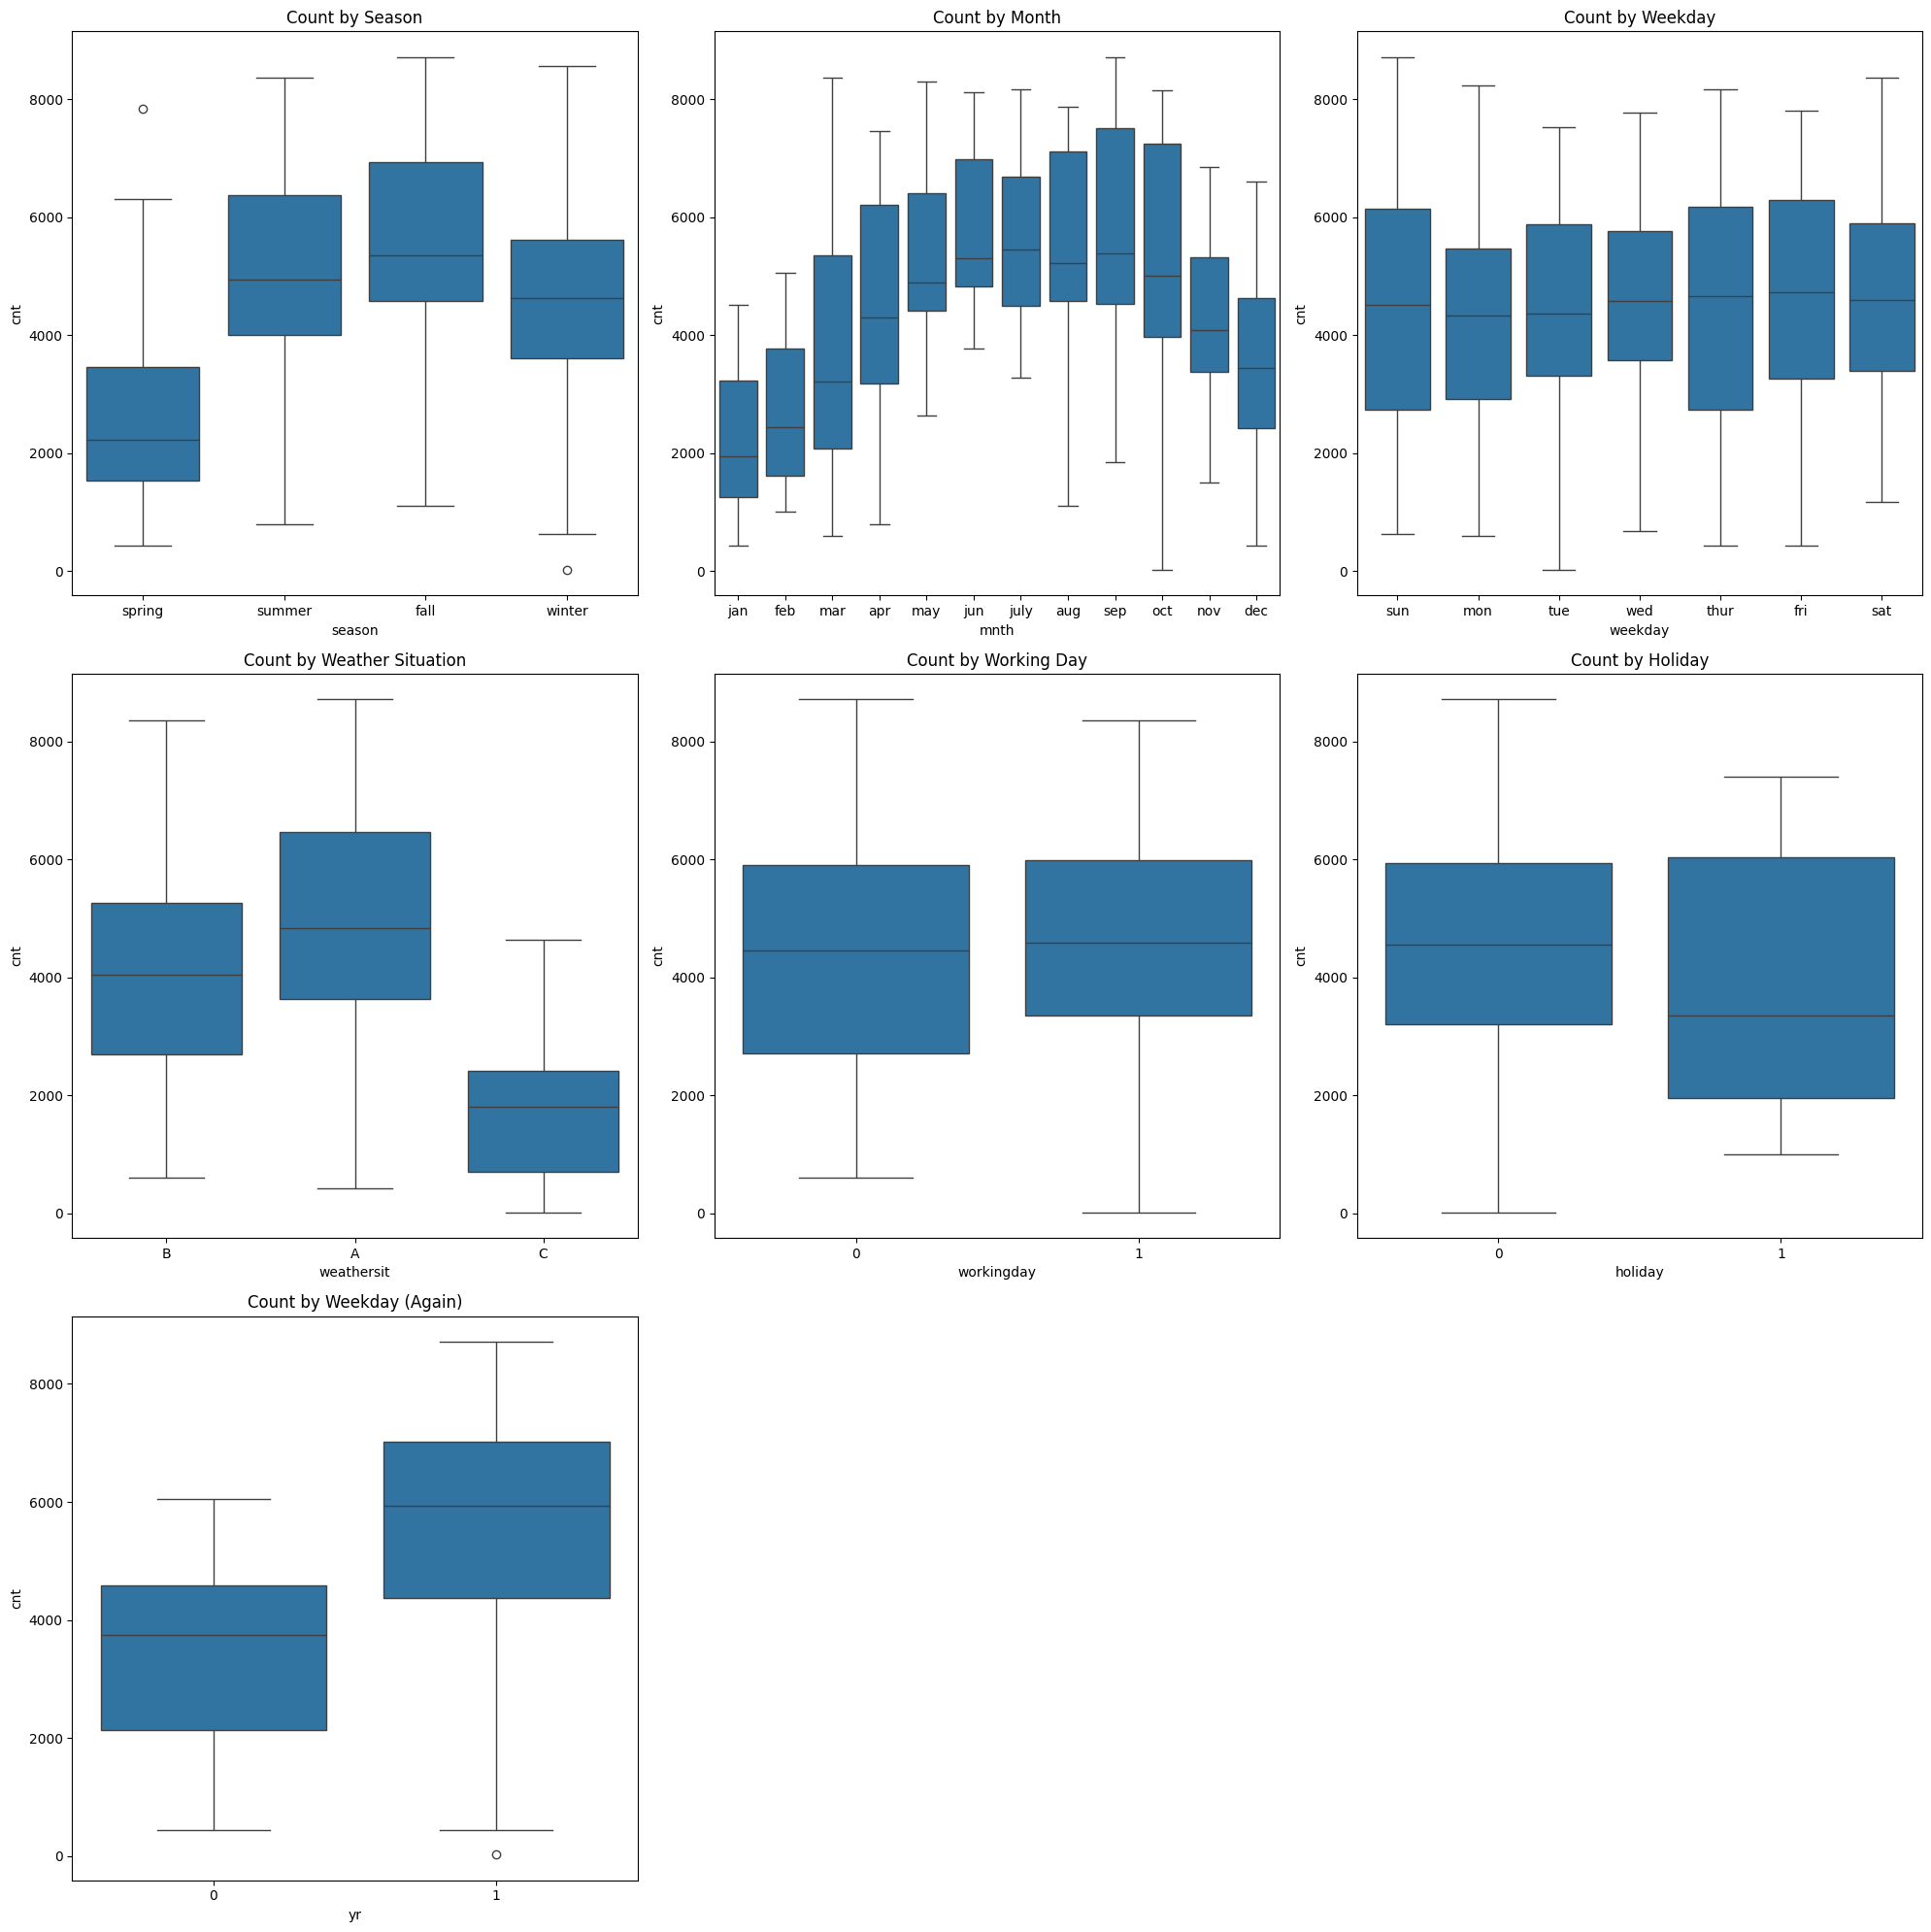

In [40]:
plt.figure(figsize=(20,20))

# 1. Count vs Season
plt.subplot(3, 3, 1)
sns.boxplot(x='season', y='cnt', data=dataset)
plt.title('Count by Season')

# 2. Count vs Month
plt.subplot(3, 3, 2)
sns.boxplot(x='mnth', y='cnt', data=dataset)
plt.title('Count by Month')

# 3. Count vs Weekday
plt.subplot(3, 3, 3)
sns.boxplot(x='weekday', y='cnt', data=dataset)
plt.title('Count by Weekday')

# 4. Count vs Weather Situation
plt.subplot(3, 3, 4)
sns.boxplot(x='weathersit', y='cnt', data=dataset)
plt.title('Count by Weather Situation')

# 5. ✅ FIXED: Count vs Working Day
plt.subplot(3, 3, 5)
sns.boxplot(x='workingday', y='cnt', data=dataset)
plt.title('Count by Working Day')

# 6. Count vs Holiday
plt.subplot(3, 3, 6)
sns.boxplot(x='holiday', y='cnt', data=dataset)
plt.title('Count by Holiday')

# 7. (Repeats weekday, but still okay if you want it twice)
plt.subplot(3, 3, 7)
sns.boxplot(x='yr', y='cnt', data=dataset)
plt.title('Count by Weekday (Again)')

plt.tight_layout()
plt.show()


In [42]:
intvarlist = ["casual",'registered',"cnt"]
for var in  intvarlist:
    dataset[var]= dataset[var].astype("float")

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [44]:
dataset_numeric = dataset.select_dtypes(include=['float64'])
dataset_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   atemp       730 non-null    float64
 2   hum         730 non-null    float64
 3   windspeed   730 non-null    float64
 4   casual      730 non-null    float64
 5   registered  730 non-null    float64
 6   cnt         730 non-null    float64
dtypes: float64(7)
memory usage: 40.1 KB


In [45]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,sun,0,B,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,mon,0,B,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,tue,1,A,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,wed,1,A,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,thur,1,A,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


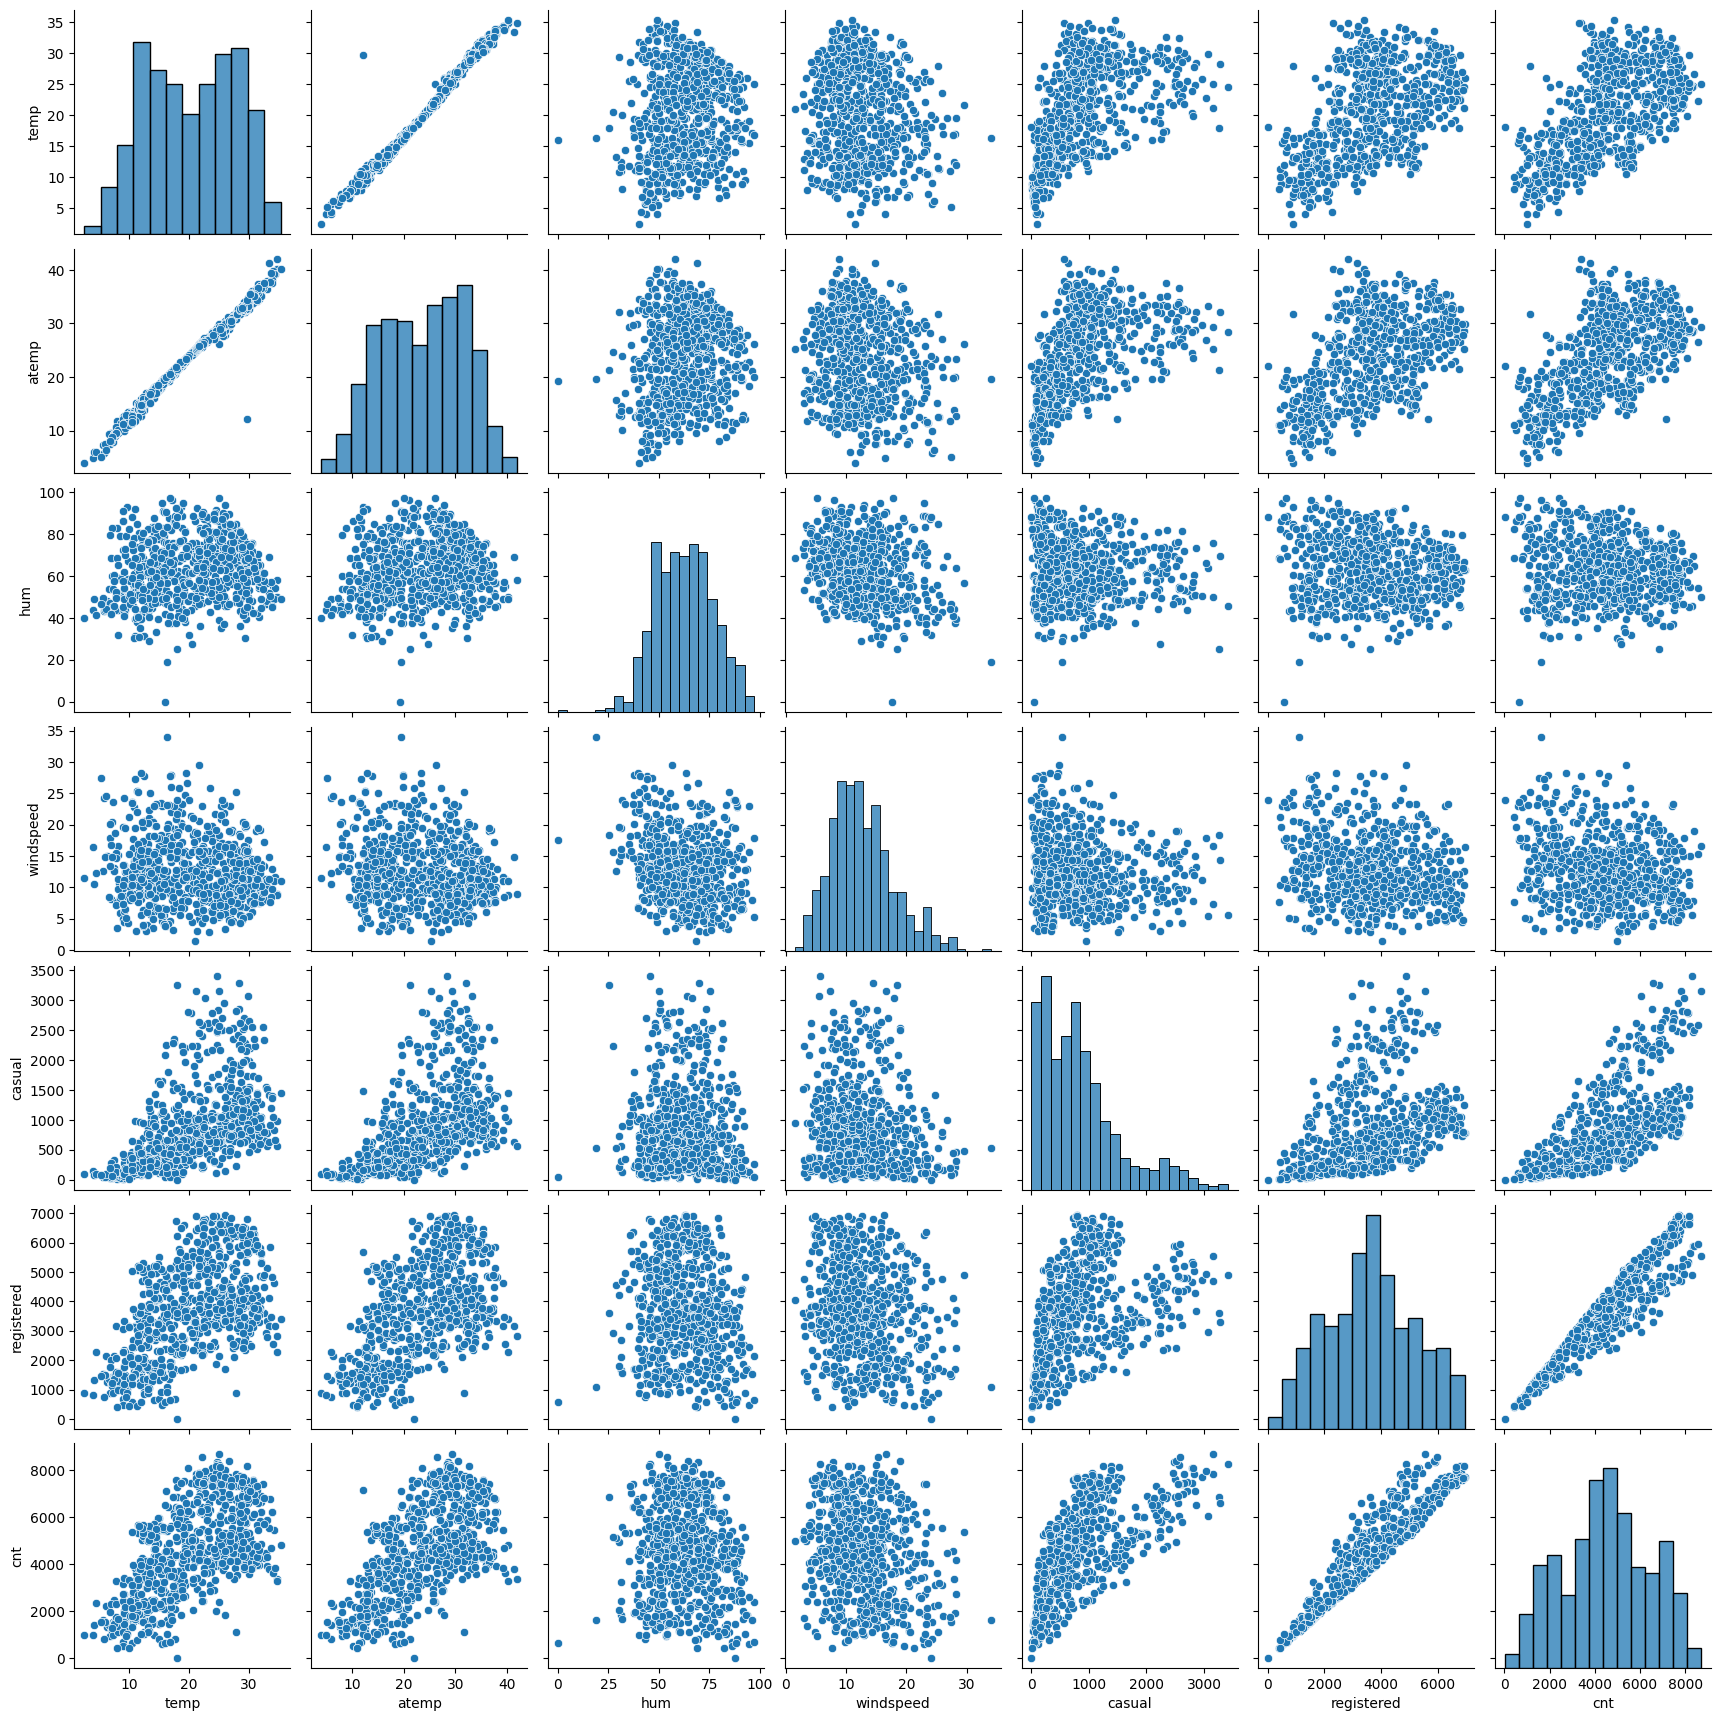

In [46]:
sns.pairplot(dataset_numeric)

In [47]:
corr = dataset_numeric.corr()
corr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


In [48]:
mask = np.array(corr)
mask[np.tril_indices_from(mask)]=False
mask

array([[ 0.        ,  0.99169618,  0.12856468, -0.15818638,  0.54273144,
         0.53943622,  0.62704403],
       [ 0.        ,  0.        ,  0.14151172, -0.1838764 ,  0.54336235,
         0.54367823,  0.63068535],
       [ 0.        ,  0.        ,  0.        , -0.24850587, -0.07521137,
        -0.08921192, -0.09854288],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.16799534,
        -0.21791436, -0.2351325 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.39413716,  0.67212341],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.94541061],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

<Axes: >

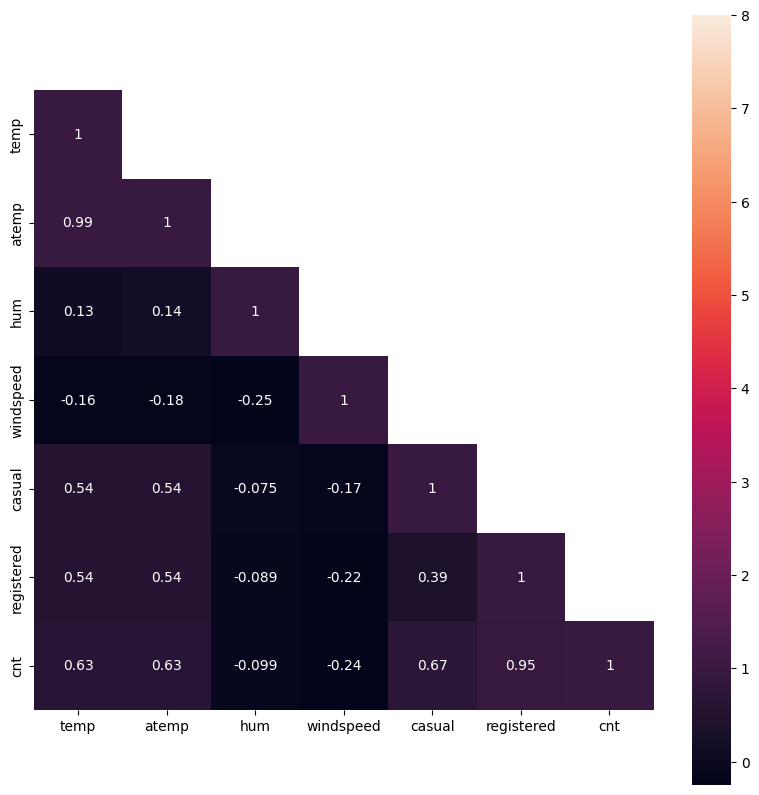

In [49]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
fig.set_size_inches(10,10)
sns.heatmap(corr,mask=mask,vmax=8,square=True,annot=True)

In [50]:
dataset.drop('atemp',axis=1,inplace=True)

In [51]:
dataset

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,jan,0,sun,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,jan,0,mon,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,jan,0,tue,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,jan,0,wed,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,jan,0,thur,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,spring,1,dec,0,fri,1,B,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,spring,1,dec,0,sat,1,B,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,spring,1,dec,0,sun,0,B,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,spring,1,dec,0,mon,0,A,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [52]:
dataset_categorical = dataset.select_dtypes(include=['object'])

In [53]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,jan,sun,B
1,spring,jan,mon,B
2,spring,jan,tue,A
3,spring,jan,wed,A
4,spring,jan,thur,A


In [54]:
dataset_dummies = pd.get_dummies(dataset_categorical,drop_first=True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_jun,mnth_mar,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [55]:
dataset = dataset.drop(list(dataset_categorical.columns),axis=1)

In [56]:
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [57]:
dataset = pd.concat([dataset,dataset_dummies],axis =1)

In [58]:
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,False,True,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,True,False,False,False,False,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,False,False,False,False,True,False,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,False,True,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,...,False,False,False,False,False,False,False,False,True,False
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,...,False,False,False,True,False,False,False,False,True,False
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,...,False,False,False,False,True,False,False,False,True,False
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,...,False,False,True,False,False,False,False,False,False,False


In [59]:
dataset= dataset.drop(['instant','dteday'],axis=1,inplace=False)

In [60]:
dataset

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,False,True,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,True,False,False,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,False,False,False,False,True,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,False,True,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0,True,...,False,False,False,False,False,False,False,False,True,False
726,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0,True,...,False,False,False,True,False,False,False,False,True,False
727,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0,True,...,False,False,False,False,True,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,True,False,False,False,False,False,False,False


In [61]:
#model building  and evaluation 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [62]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size= 0.7,test_size=0.3,random_state=100)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()

In [64]:
scaler

MinMaxScaler()

In [65]:
var =["temp","hum","windspeed","casual","registered","cnt"]

In [66]:
df_train[var] = scaler.fit_transform(df_train[var])

In [67]:
var

['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [68]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

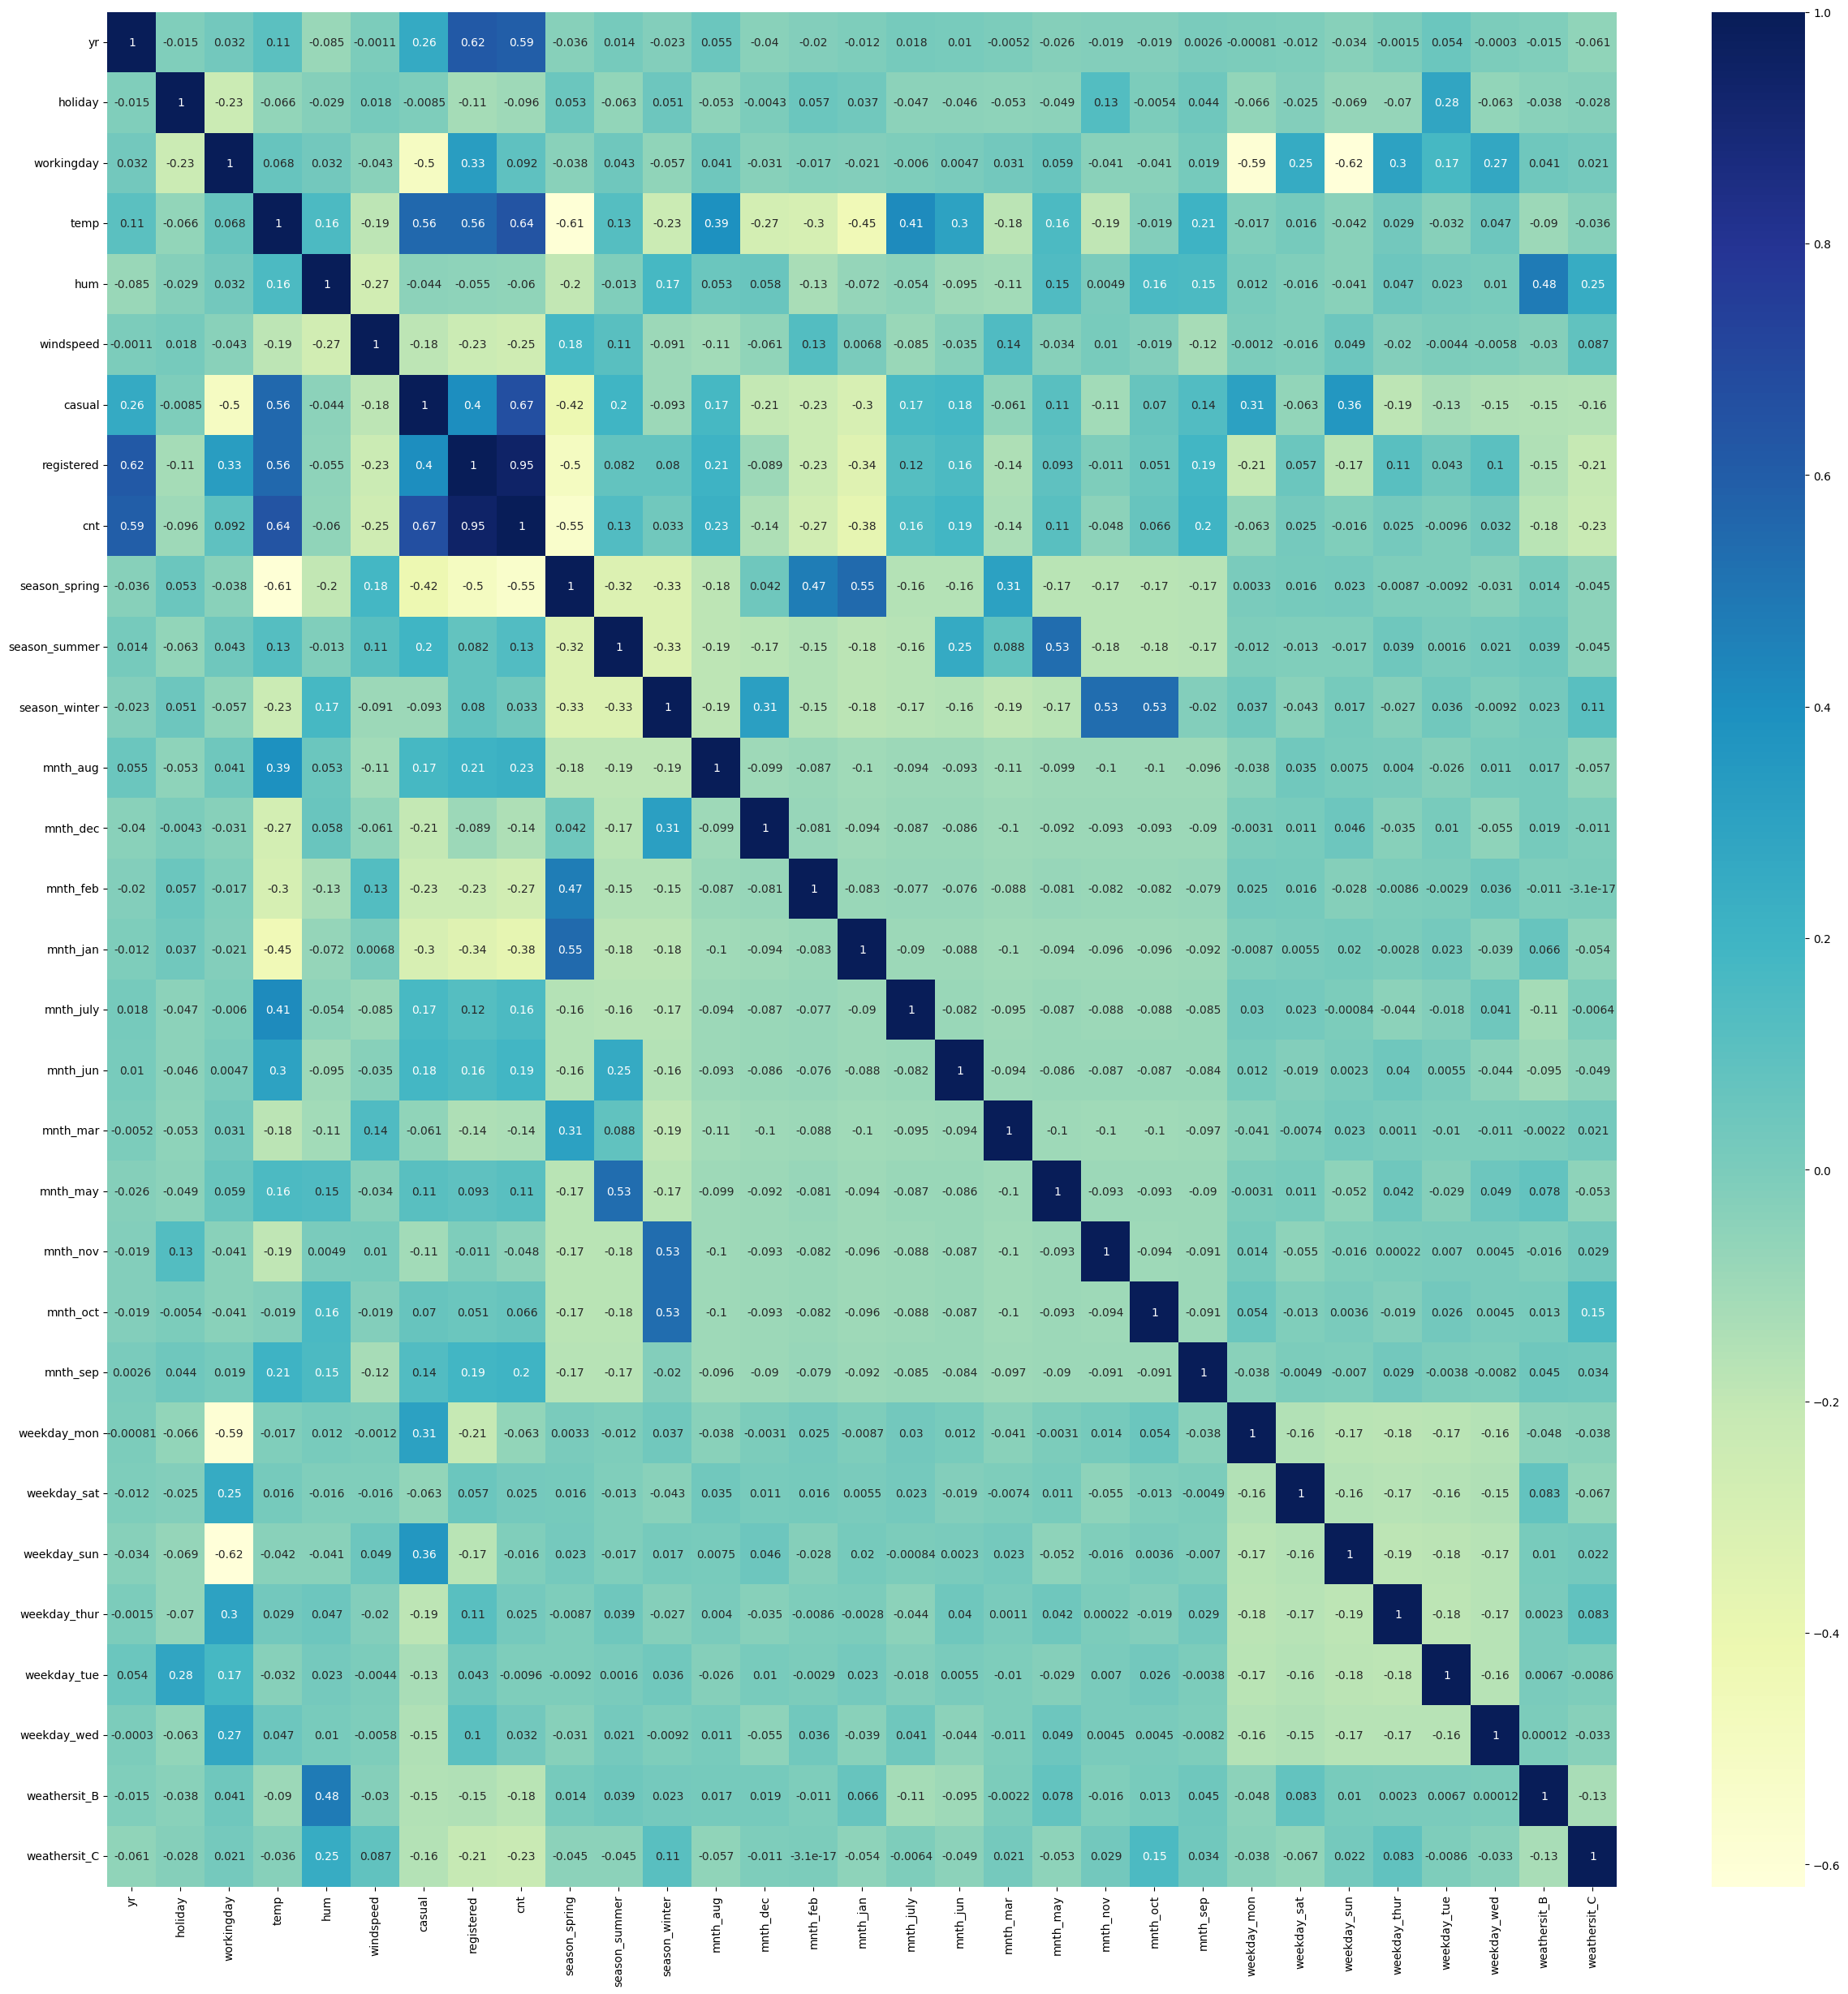

In [69]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot =True,cmap="YlGnBu")

In [70]:
x_train = df_train.drop(["casual","registered"],axis =1)
y_train = df_train.pop('cnt')

In [71]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,False,True,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,False,True,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,False,True,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,True,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [72]:
x_train.drop(['cnt'],axis=1,inplace=True)

In [73]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
576,1,0,1,0.815169,0.725633,0.264686,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
426,1,0,0,0.442393,0.640189,0.255342,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [74]:
#np.array(x_train)

In [75]:
x_train = x_train.astype(float)
x_train = x_train.apply(pd.to_numeric)



In [76]:
x_train = x_train.fillna(0)


In [ ]:
x_train = x_train.dropna()
y_train = y_train.loc[x_train.index]  # sync y with x --- IGNORE ---
#y_train = y_train.loc[x_train.index]  # sync y with x --- IGNORE ---


In [78]:
import statsmodels.api as sm 
x_train_lm =sm.add_constant(x_train)

lr = sm.OLS(y_train,x_train_lm).fit()

In [79]:
lr.params

const            0.241390
yr               0.232116
holiday          0.004417
workingday       0.091342
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_aug         0.014404
mnth_dec        -0.045586
mnth_feb        -0.032282
mnth_jan        -0.062777
mnth_july       -0.040350
mnth_jun        -0.002972
mnth_mar         0.001045
mnth_may         0.023940
mnth_nov        -0.041851
mnth_oct         0.007534
mnth_sep         0.081060
weekday_mon      0.045548
weekday_sat      0.009237
weekday_sun      0.100083
weekday_thur     0.003849
weekday_tue     -0.011670
weekday_wed     -0.009653
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [80]:
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [81]:
print(lm.coef_)
print(lm.intercept_)

[ 2.31841774e-01 -1.51095942e+12 -1.51095942e+12  4.50427522e-01
 -1.50226110e-01 -1.86613570e-01 -4.80984285e-02  3.88069972e-02
  1.05594262e-01  1.41150162e-02 -4.55438890e-02 -3.16404803e-02
 -6.30777210e-02 -4.10269589e-02 -3.47272392e-03  9.56481375e-04
  2.37375001e-02 -4.22973633e-02  7.78198242e-03  8.05892944e-02
 -1.51095942e+12  9.17053223e-03 -1.51095942e+12  3.87954712e-03
 -1.20849609e-02 -1.00359917e-02 -6.08520508e-02 -2.57568359e-01]
1510959418892.443


In [82]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          8.74e-182
Time:                        11:18:32   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2414      0.035      6.834      0.000       0.172       0.311
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0044      0.024      0.185      0.854      -0.043       0.051
workingday        0.0913      0.012      7.393      0.000       0.067       0.116
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july        -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon       0.0455      0.014      3.299      0.001       0.018       0.073
weekday_sat       0.0092      0.016      0.595      0.552      -0.021       0.040
weekday_sun       0.1001      0.014      7.367      0.000       0.073       0.127
weekday_thur      0.0038      0.015      0.263      0.793      -0.025       0.033
weekday_tue      -0.0117      0.015     -0.773      0.440      -0.041       0.018
weekday_wed      -0.0097      0.015     -0.627      0.531      -0.040       0.021
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.50e+15
================================================================

In [83]:
from sklearn.feature_selection import RFE

In [84]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)

rfe1.fit(x_train, y_train)
print(rfe1.ranking_)


[ 1  1  1  1  1  1  1  5  1  8  3  4  1  1 11 14  6  2 10  1  1  7  1  9
 13 12  1  1]


In [85]:
col1 = x_train.columns[rfe1.support_]

In [86]:
col1

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_july', 'mnth_sep',
       'weekday_mon', 'weekday_sun', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [87]:
x_train_rfe1 = x_train[col1]



In [88]:
x_train_rfe1 =sm.add_constant(x_train_rfe1)
lm1 = sm.OLS(y_train,x_train_lm).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          8.74e-182
Time:                        11:18:34   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2414      0.035      6.834      0.000       0.172       0.311
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0044      0.024      0.185      0.854      -0.043       0.051
workingday        0.0913      0.012      7.393      0.000       0.067       0.116
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_july        -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_may          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_mon       0.0455      0.014      3.299      0.001       0.018       0.073
weekday_sat       0.0092      0.016      0.595      0.552      -0.021       0.040
weekday_sun       0.1001      0.014      7.367      0.000       0.073       0.127
weekday_thur      0.0038      0.015      0.263      0.793      -0.025       0.033
weekday_tue      -0.0117      0.015     -0.773      0.440      -0.041       0.018
weekday_wed      -0.0097      0.015     -0.627      0.531      -0.040       0.021
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.50e+15
================================================================

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Remove constant column (if added earlier for statsmodels)
a = x_train_rfe1.drop('const', axis=1)

# Evaluating VIFs
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)

# Sort by VIF descending
vif = vif.sort_values(by='VIF', ascending=False)
vif


,features,VIF
2,workingday,41.60
12,weekday_sun,10.14
11,weekday_mon,9.82
3,temp,3.19
6,season_spring,2.72
1,holiday,2.58
4,hum,1.90
7,season_winter,1.81
13,weathersit_B,1.57
8,mnth_jan,1.55


In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

lm = LinearRegression()
rfe2 = RFE(estimator=lm, n_features_to_select=7)
rfe2.fit(x_train, y_train)
print(rfe2.support_)
print(rfe2.ranking_)

col2 = x_train.columns[rfe2.support_]
x_train_rfe2 = x_train[col2]
x_train_rfe2 = sm.add_constant(x_train_rfe2)
lm2 = sm.OLS(y_train, x_train_rfe2).fit()
print(lm2.summary())


[ True  True  True  True False False False False False False False False
 False False False False False False False False  True False  True False
 False False False  True]
[ 1  1  1  1  3  2  4 13  8 16 11 12  9  5 19 22 14 10 18  7  1 15  1 17
 21 20  6  1]
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     224.0
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          1.41e-138
Time:                        11:18:35   Log-Likelihood:                 370.22
No. Observations:                 510   AIC:                            -726.4
Df Residuals:                     503   BIC:                            -696.8
Df Model:                           6                                         
Covariance Type:            no

       features   VIF
2    workingday  5.51
5   weekday_sun  1.91
4   weekday_mon  1.88
1       holiday  1.11
0            yr  1.02
3          temp  1.02
6  weathersit_C  1.01


<Figure size 640x480 with 0 Axes>

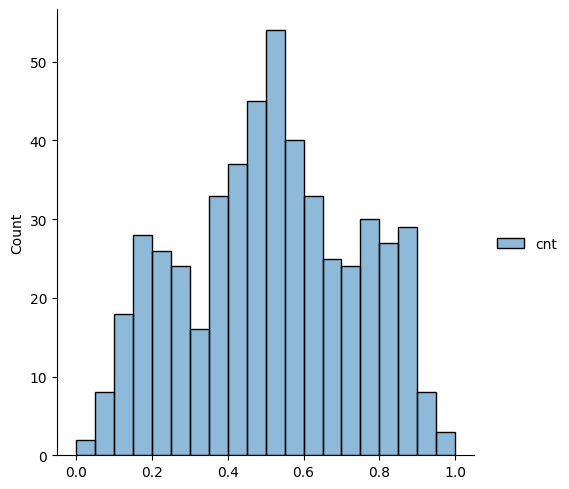

In [93]:
b = x_train_rfe2.drop('const', axis=1)
vif1 = pd.DataFrame()
vif1['features'] = b.columns
vif1['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by='VIF', ascending=False)
print(vif1)

y_train_cnt = lm2.predict(x_train_rfe2)

fig = plt.figure()
sns.displot((y_train, y_train_cnt), bins=20)


In [92]:
df_test[var] = scaler.transform(df_test[var])
y_test = df_test.pop('cnt')
x_test = df_test.drop({'casual', 'registered'}, axis=1)


In [94]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thur,weekday_tue,weekday_wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
535,1,0,1,0.901354,0.610133,0.153728,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
299,0,0,1,0.511964,0.837699,0.334206,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
221,0,0,1,0.881625,0.437098,0.339570,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
152,0,0,1,0.817246,0.314298,0.537414,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   temp          219 non-null    float64
 5   weekday_mon   219 non-null    bool   
 6   weekday_sun   219 non-null    bool   
 7   weathersit_C  219 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 10.9 KB


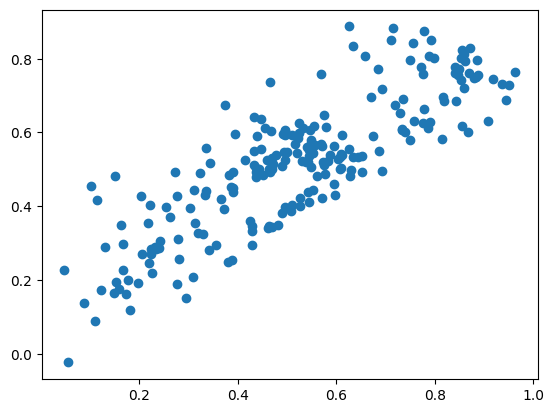

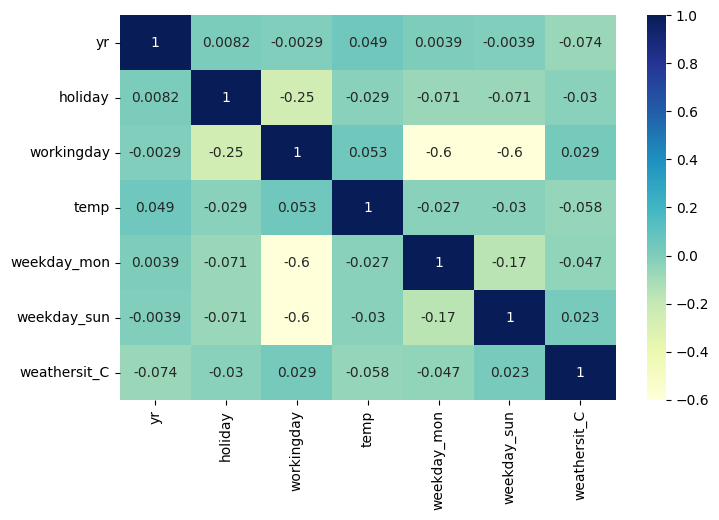

In [95]:

from sklearn.metrics import r2_score

c = x_train_rfe2.drop('const', axis=1)
col2 = c.columns
x_test_rfe2 = x_test[col2]
x_test_rfe2 = sm.add_constant(x_test_rfe2)
x_test_rfe2.info()

y_pred = lm2.predict(x_test_rfe2)

plt.figure()
plt.scatter(y_test, y_pred)

r2_score(y_test, y_pred)

plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(), cmap = "YlGnBu", annot=True)
plt.show()